# Logistic Regression 

- Logistic regression is a type of calssification algorithm in ML that helps us classify whether or not a certain input falls under a class. It's mainly used for binary classifiaction (0/1).
Logistic regression uses `Sigmoid` function, which is also called logistic function. The function can be defined as so:
$$
\sigma (x) = \frac{1}{1+e^{-x}}
$$

where,
x is the input to the function and `e` is the base of natural log. (approx. 2.718)

The sigmoid function is smooth and differential. It is also suitable in various optimization algorithms. In Logistic regression, it is applied to linear combinations of input features and weights, which produces a value that can be interpreted as a probability of belonging to a particular class. When plotted the curve(graph) of the sigmoid funciton, it looks like so:

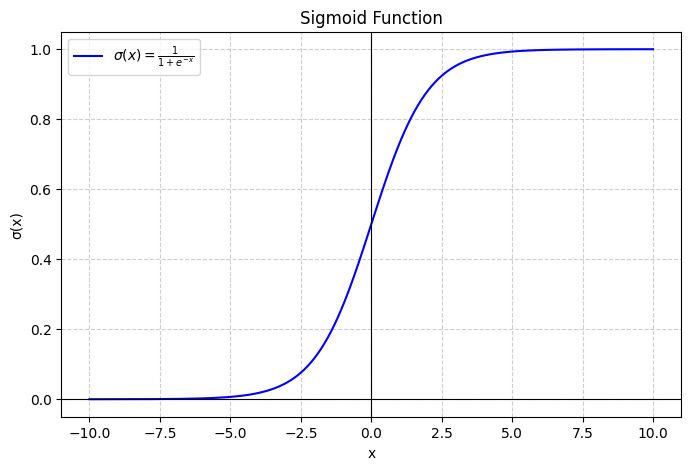

Logistic regression utilises the same graph with a threshold and using that threshold, it helps u decide in which class a data point falls on. To better understand this, we'll do a titanic survivor prediction project.

In [2]:
import pandas as pd #For data reading and cleaning
from sklearn.linear_model import LogisticRegression #Log. Reg model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #Plotting the model's accuracy and other metrics

### EDA for the dataset

In [3]:
df = pd.read_csv("Titanic-Dataset.csv") #read data
df.head() #Show top 5 entries in the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this specifc dataset, there's some new terms , the appendix for those terms is given below:
- PClass → Passenger Class(Socio-econmic distribution of the passengers)
- SibSp → Number of siblings of the passengers
- Parch → Number of parents/children the passenger had on board.
- Embarked → In which port did the passenger embark on the ship

#### Data Cleaning,Preprocessing and EDA

From the columns in the dataframe, let's remove the useless columns such as the name, PassengerId, ticket, fare and so on.

In [4]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Since sex is a boolean value (either male or female) we can use panda's `.map()` function to map it to a 0 or 1. Similarly, embarked also has three values `S,Q,C`. Let's map these to 1,2 and 3.

In [6]:
df['Sex'] = df['Sex'].map({"male":1,"female":0})
df['Embarked'] = df['Embarked'].map({"S":1,"Q":2,"C":3})

In [7]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.464567
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.dropna(inplace=True)

Since our data is clean and has no missing values, let's start making the LogisticRegression model.

Our independent variables/columns are basically everythng other than Survived. Let's start by clearly defining X and Y for our model.

In [10]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
Y = df['Survived'].values

In [11]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

The `max_iter` parameter in `LogisticRegression` class is used to determine the maximum number of iterations through the data in order to find the optimal model parameters. It's a maximum/upper limit meaning, if the model finds the optimal params before the set amount, the iterations will stop.

Now that we've got our model, let's test if it perfromed well on the data set using accuracy score and other metrics.